
Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s

In [39]:
#importing necessary libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [40]:
# reading data and loading it to dataframe

df = pd.read_csv(r'C:\Users\Dell\Documents\python programs\boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [41]:
# checking shape of dataframe
df.shape

(506, 15)

In [42]:
# using info method to print information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [43]:
# using describe function to print the statistical summary of dataframe
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,253.5,146.2,1.0,127.2,253.5,379.8,506.0
crim,506.0,3.6,8.6,0.0,0.1,0.3,3.7,89.0
zn,506.0,11.4,23.3,0.0,0.0,0.0,12.5,100.0
indus,506.0,11.1,6.9,0.5,5.2,9.7,18.1,27.7
chas,506.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
nox,506.0,0.6,0.1,0.4,0.4,0.5,0.6,0.9
rm,506.0,6.3,0.7,3.6,5.9,6.2,6.6,8.8
age,506.0,68.6,28.1,2.9,45.0,77.5,94.1,100.0
dis,506.0,3.8,2.1,1.1,2.1,3.2,5.2,12.1
rad,506.0,9.5,8.7,1.0,4.0,5.0,24.0,24.0


In [44]:
# checking for total no.of duplicates in the dataframe
df.duplicated().sum()

0

In [45]:
del df['Unnamed: 0'] #since no duplicate, now we dont need this column

In [46]:
# checking if any column has zero values
(df==0).sum()

crim         0
zn         372
indus        0
chas       471
nox          0
rm           0
age          0
dis          0
rad          0
tax          0
ptratio      0
black        0
lstat        0
medv         0
dtype: int64

In [47]:
df['zn'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
25.0      10
22.0      10
40.0       7
30.0       6
45.0       6
90.0       5
95.0       4
21.0       4
60.0       4
33.0       4
28.0       3
52.5       3
75.0       3
34.0       3
35.0       3
70.0       3
55.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: zn, dtype: int64

In [48]:
df.chas.value_counts()

0    471
1     35
Name: chas, dtype: int64

In [11]:
# value_counts in chas column showed us it has values 0 and 1 and hence 1 is not an outlier

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

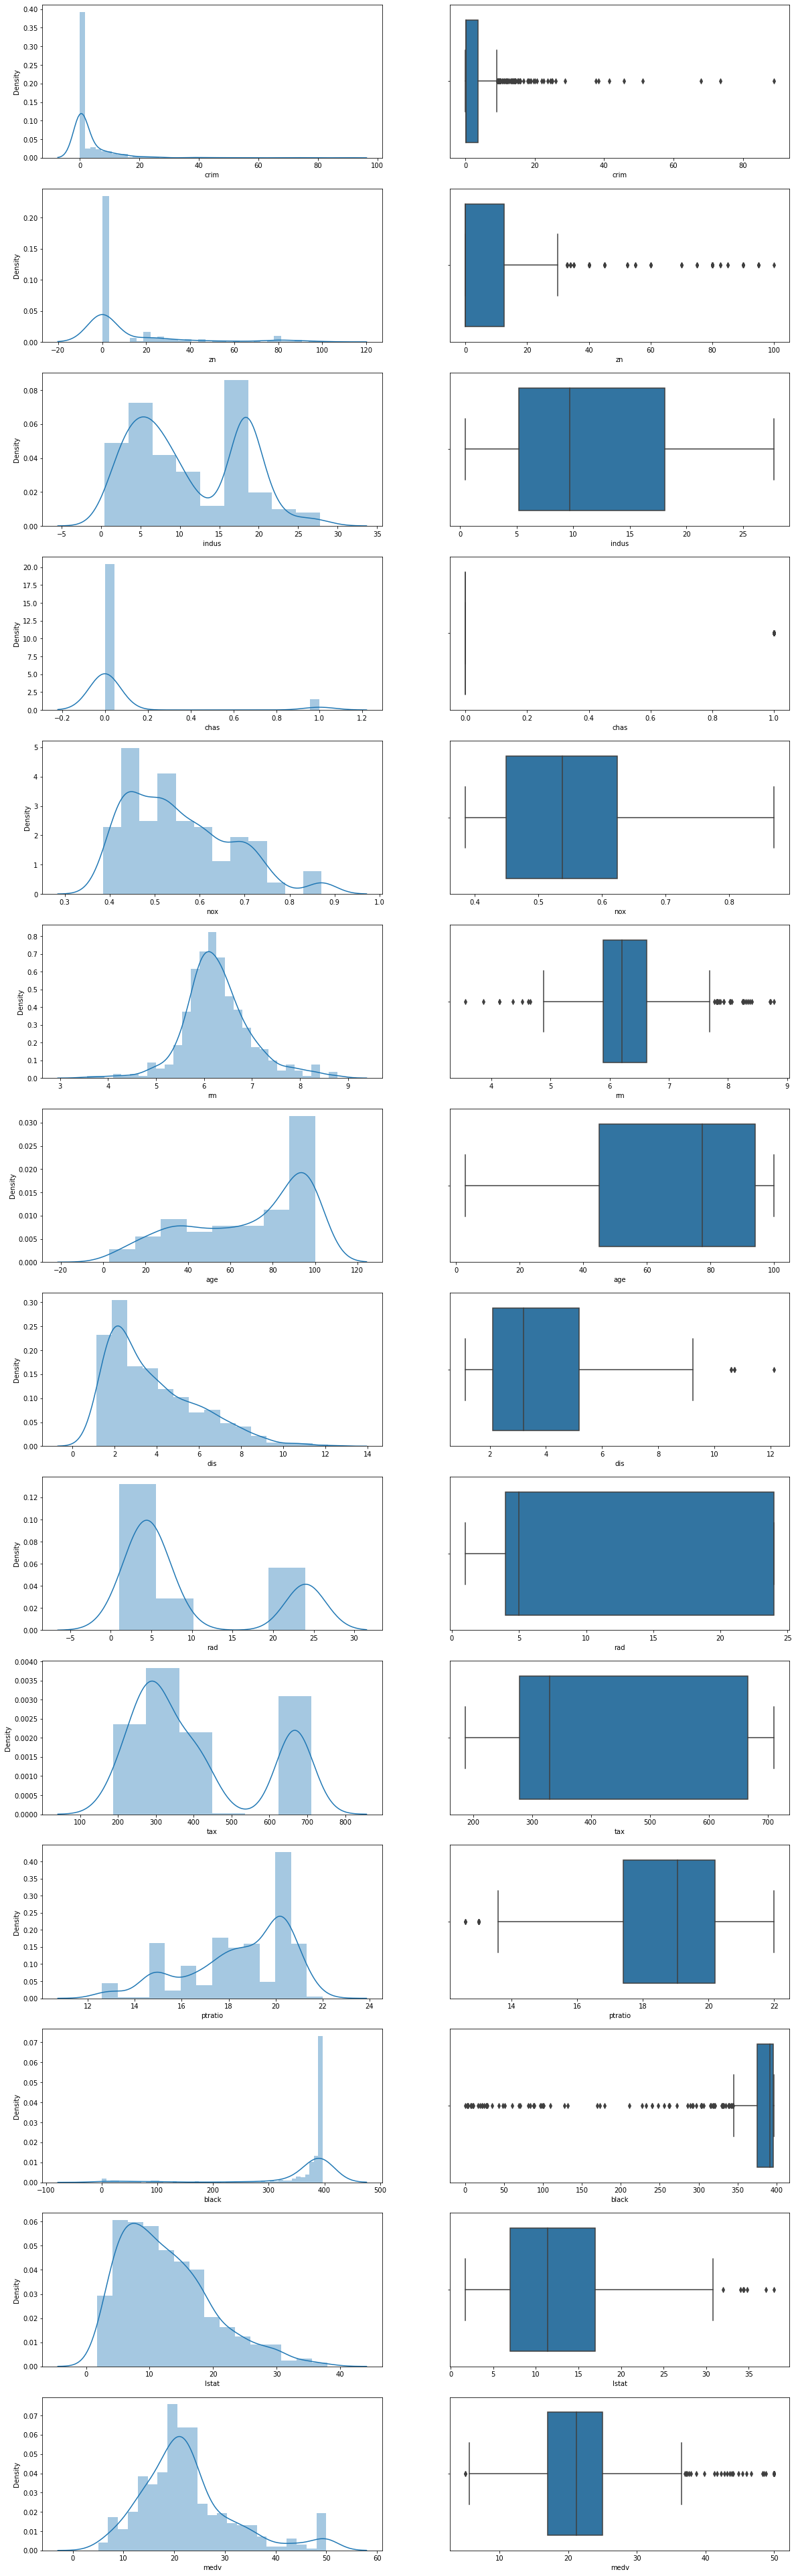

In [49]:
# plotting distplot and boxplot for all columns in the dataframe to check for distribution and outliers

def plotdist_box(data):
    d = pd.DataFrame(data,columns = data.columns)
    fig,axes =plt.subplots(nrows =d.columns.nunique(),ncols =2,figsize=(20,70))
    r =0
    for i in d.columns:
        sns.distplot(d[i],kde= True,ax=axes[r][0])
        sns.boxplot(x=i,data=d, ax=axes[r][1])
        plt.show
        r = r +1
plotdist_box(df)

In [13]:
# outliers are found in columns [crim,zn,rm,dis,ptratio,black,lstat,medv]

In [50]:
# function to return lower and upper range 
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
    

In [51]:
# Cap and Floor the values beyond the outlier boundaries

l =['crim','zn','rm','dis','ptratio','black','lstat','medv']
for i in l:
    lr,ur = remove_outlier(df[i])
    df[i]=np.where(df[i]>ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])

<AxesSubplot:>

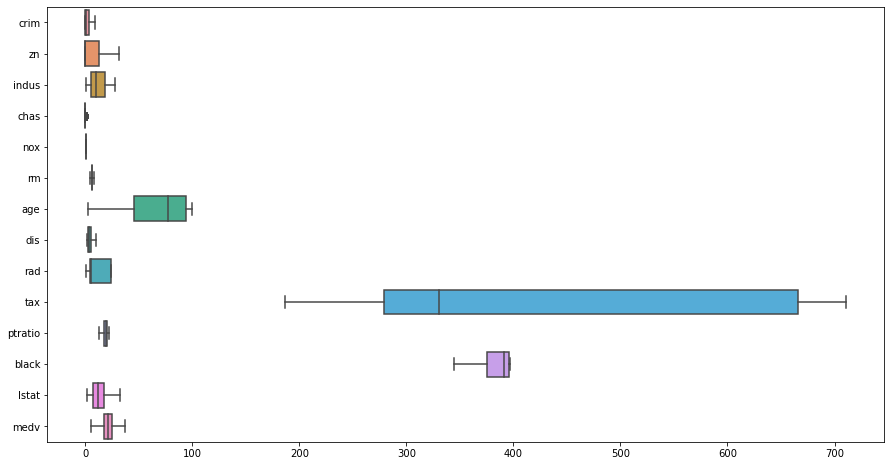

In [52]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, orient='h' )

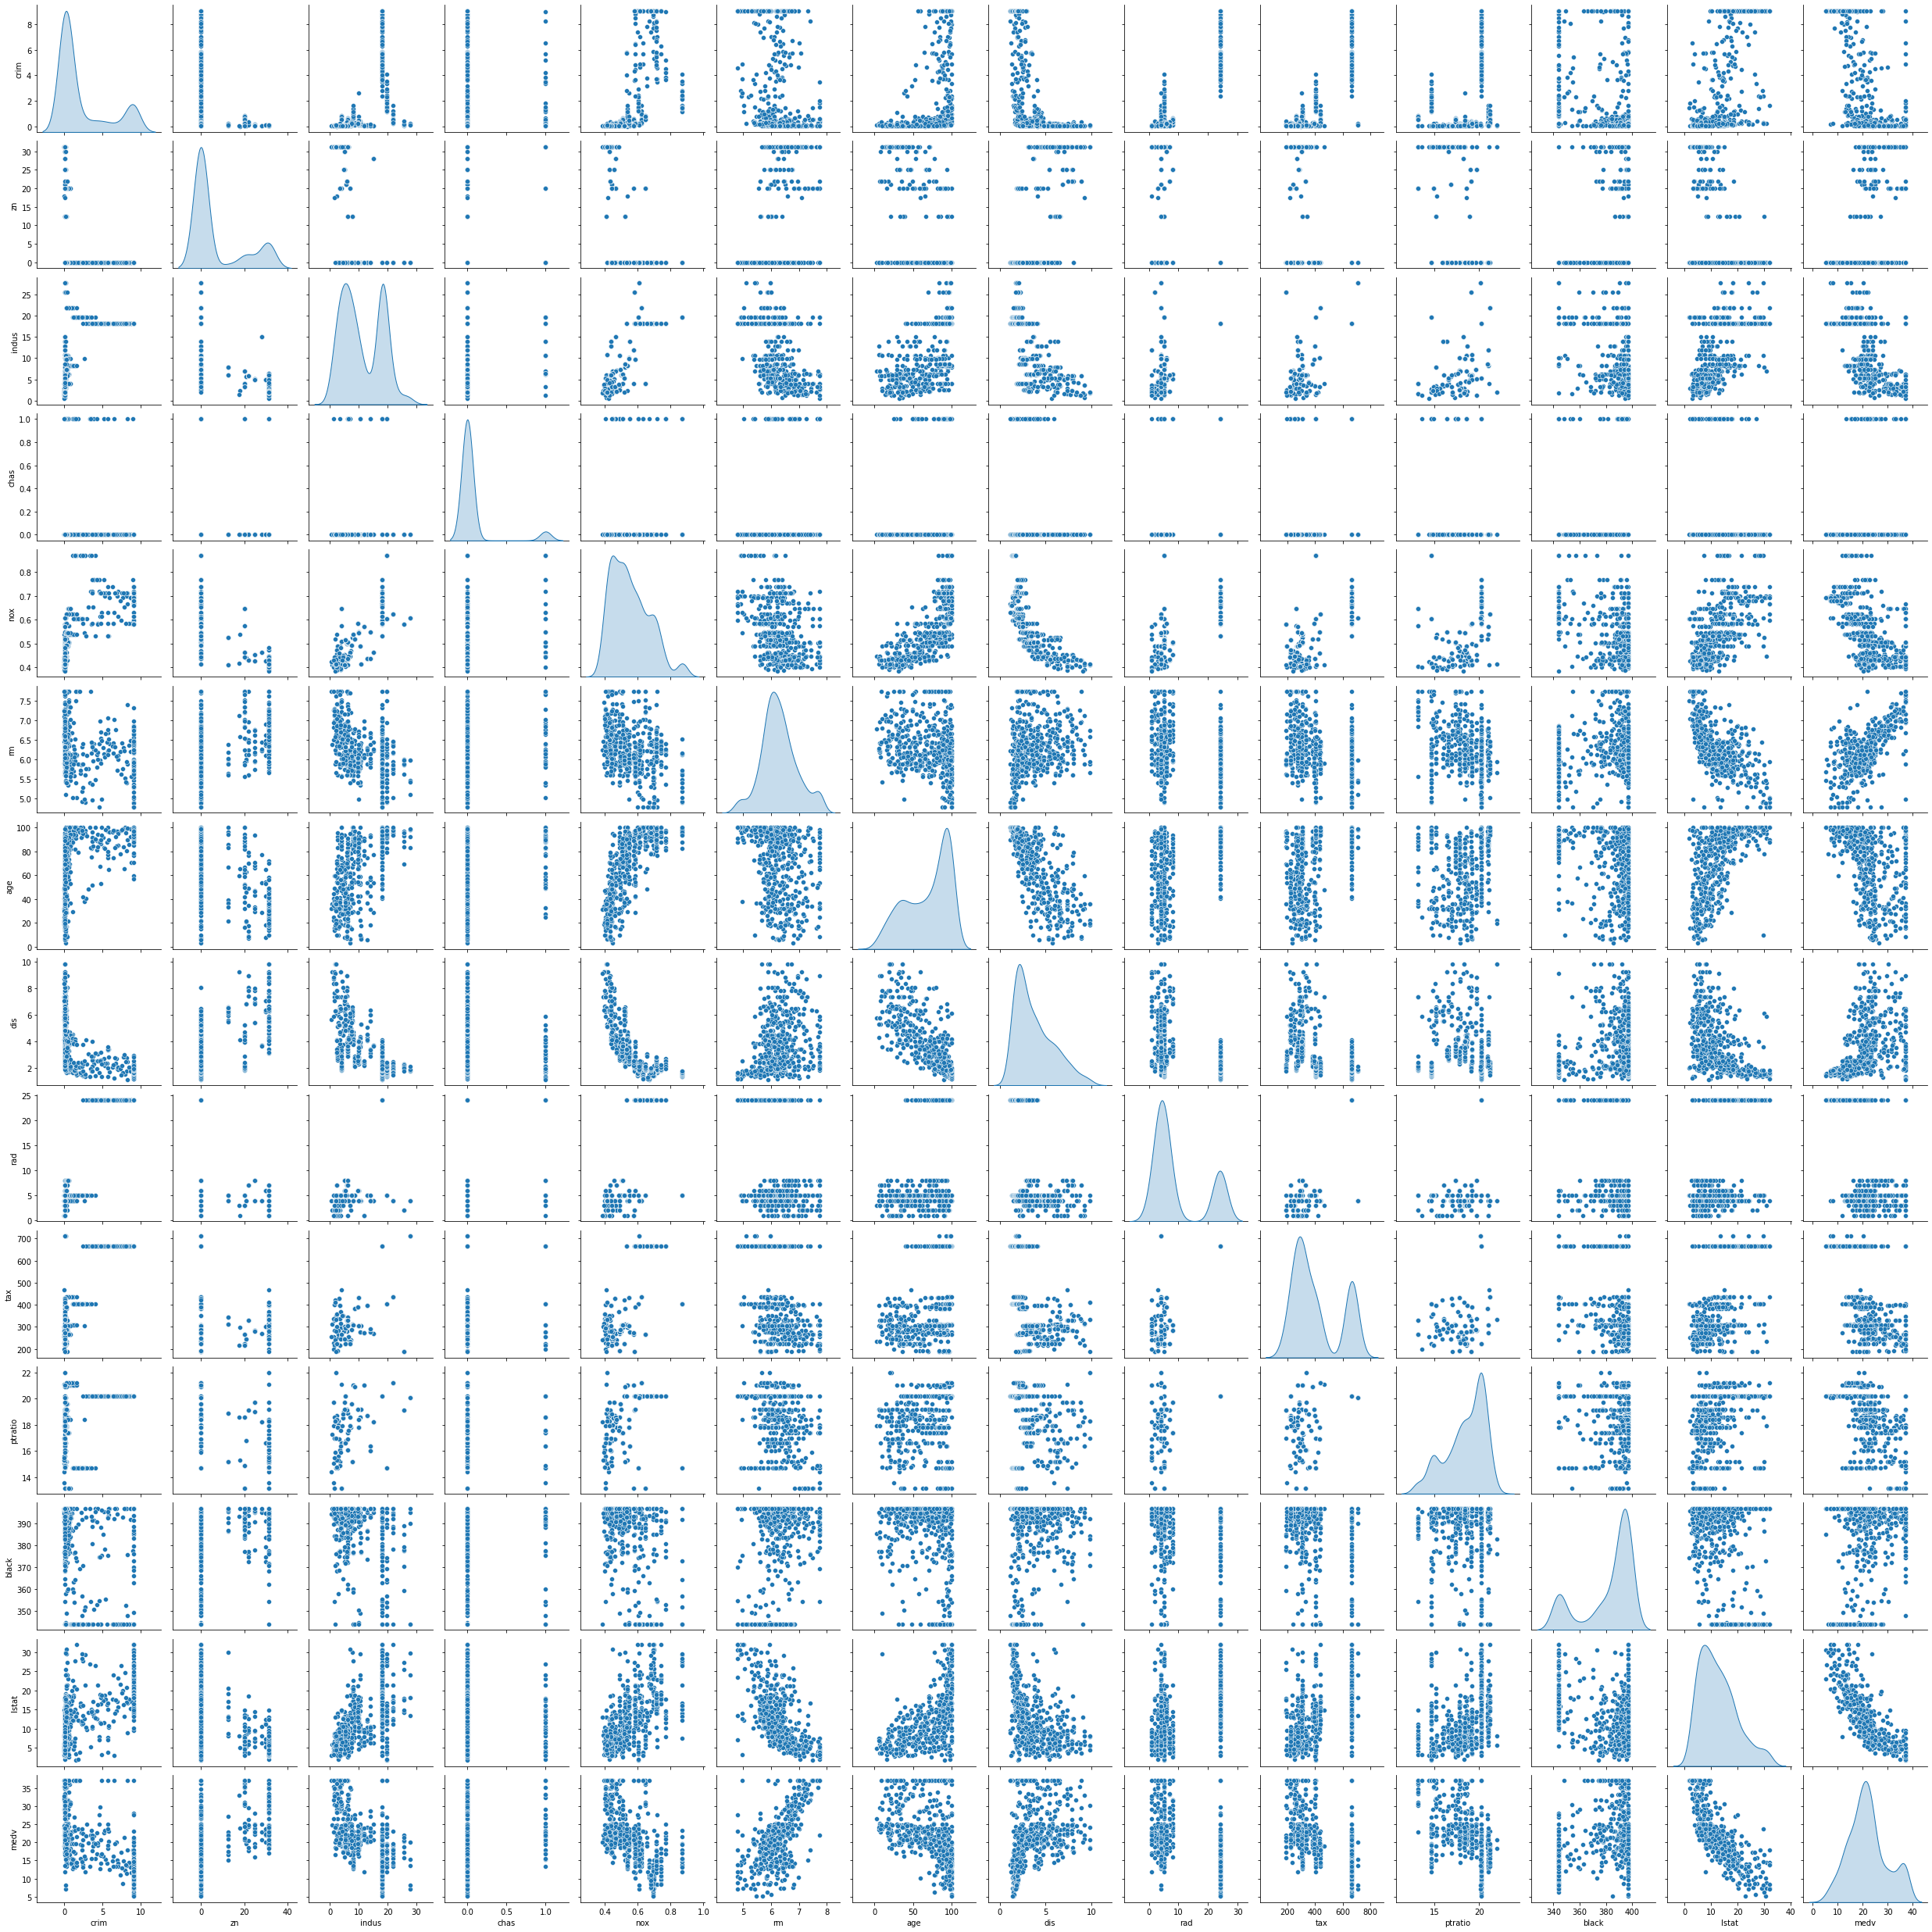

In [53]:
sns.pairplot(df,diag_kind='kde')
plt.show()

<AxesSubplot:>

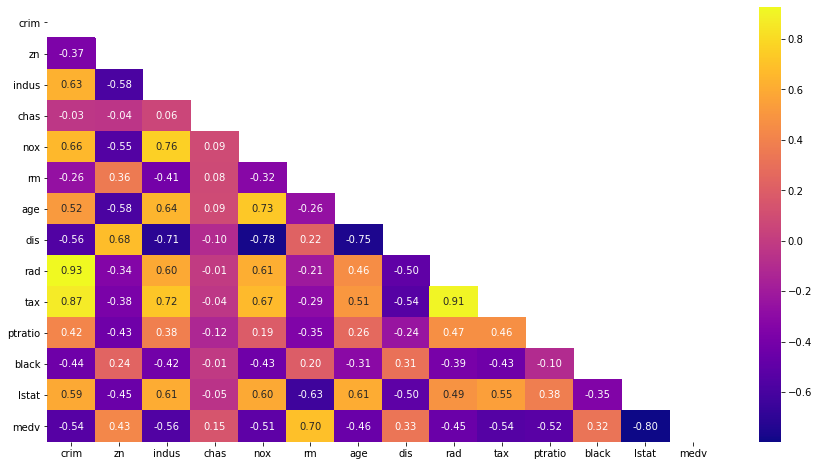

In [54]:
#plotting heatmap to check the correlation

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), mask=np.triu(df.corr()), cmap='plasma', annot=True, fmt='.2f')

In [55]:
(df['zn']==0).sum()

372

In [56]:
df=df.drop('zn',axis=1)

In [57]:
df.head(2)

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [58]:
df[df.columns[1:]].corr()['medv'][:]

indus     -0.561174
chas       0.146061
nox       -0.506505
rm         0.697645
age       -0.458662
dis        0.333079
rad       -0.452679
tax       -0.543545
ptratio   -0.523993
black      0.321250
lstat     -0.797200
medv       1.000000
Name: medv, dtype: float64

In [59]:
X1 =df[['indus','nox','rm','age','rad','tax','ptratio','lstat']] 
X1.head(2)

,indus,nox,rm,age,rad,tax,ptratio,lstat
0,2.31,0.538,6.575,65.2,1,296,15.3,4.98
1,7.07,0.469,6.421,78.9,2,242,17.8,9.14


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [61]:
calc_vif(X1)

,variables,VIF
0,indus,12.664700
1,nox,73.025457
2,rm,70.375532
3,age,16.794436
4,rad,12.496226
5,tax,55.450547
6,ptratio,63.963447
7,lstat,10.485155


In [62]:
X1 = X1.drop("nox",axis =1)

In [63]:
calc_vif(X1)

,variables,VIF
0,indus,10.965197
1,rm,49.264632
2,age,14.409785
3,rad,12.495947
4,tax,54.620394
5,ptratio,63.812364
6,lstat,9.724047


In [64]:
X1= X1.drop("ptratio",axis=1)
calc_vif(X1)

,variables,VIF
0,indus,10.927368
1,rm,14.249373
2,age,14.305484
3,rad,12.434716
4,tax,52.884067
5,lstat,8.126859


In [65]:
X1= X1.drop("tax",axis=1)
calc_vif(X1)

,variables,VIF
0,indus,8.338037
1,rm,5.886476
2,age,14.199846
3,rad,3.558490
4,lstat,7.723288


In [66]:
X1= X1.drop("age",axis=1)
calc_vif(X1)

,variables,VIF
0,indus,7.007669
1,rm,3.712221
2,rad,3.554973
3,lstat,6.408164


In [68]:
X1

,indus,rm,rad,lstat
0,2.31,6.575,1,4.98
1,7.07,6.421,2,9.14
2,7.07,7.185,2,4.03
3,2.18,6.998,3,2.94
4,2.18,7.147,3,5.33
...,...,...,...,...
501,11.93,6.593,1,9.67
502,11.93,6.120,1,9.08
503,11.93,6.976,1,5.64
504,11.93,6.794,1,6.48


In [69]:
X = X1
y = df['medv']

In [70]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

let us break the df1 and y dataframes into training set and test set. for this we will use sklearn's data splitting function
which is based on random function


In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.20,random_state=1)

In [72]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#lr.coef_

In [73]:
#let us explore coefficients for each of the independent attributes

for i, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,lr.coef_[i]))

The coefficient for indus is -0.07943514650617171
The coefficient for rm is 3.9499950110180104
The coefficient for rad is -0.09356289064352188
The coefficient for lstat is -0.5314681158128967


In [74]:
# lets check the intercept for the model

print("The intercept for our model is {}".format(lr.intercept_))

The intercept for our model is 5.7210180650103695


In [75]:
# score on training set
lr.score(X_train,y_train)

0.716214153284975

In [76]:
# score on test set 
lr.score(X_test,y_test)

0.6901392149314447

In [77]:
# fuction that returns adjusted R-square

def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
    

In [78]:
# calculating adjusted R-square for train dataset
adj_r2(X_train,y_train)

0.7133691823905888

In [79]:
# calculating adjusted R-square for test dataset

adj_r2(X_test,y_test)

0.6773614505987208

In [108]:
import pickle
pickle.dump(lr,open('linear_regression_boston_price.sav','wb'))

In [110]:
pickle.dump(lr,open('linear_regression_boston_price.pickle','wb'))

#---------------------------------------Using Statsmodel library to get outputs-----------------------------------------------

In [ ]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributres have no influence on the predicted variable.
# Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit learn does not provide a facility for adjusted R^2....so we use
# statsmodel, a library that gives result similar to what u obtain in R language
# This library expects the X and Y to be given in one single dataframe

In [80]:
data_train = pd.concat([X_train,y_train],axis = 1)
data_train.head()

,indus,rm,rad,lstat,medv
42,6.91,6.169,3,5.81,25.3
58,5.13,6.145,8,6.86,23.3
385,18.10,5.277,24,30.81,7.2
78,12.83,6.232,5,12.34,21.2
424,18.10,5.565,24,17.16,11.7


In [81]:
import statsmodels.formula.api as smf

In [82]:
lrs = smf.ols(formula='medv~indus+rm+rad+lstat',data=data_train).fit()
lrs.params

Intercept    5.721018
indus       -0.079435
rm           3.949995
rad         -0.093563
lstat       -0.531468
dtype: float64

In [83]:
print(lrs.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     251.7
Date:                Wed, 02 Feb 2022   Prob (F-statistic):          1.07e-107
Time:                        09:37:14   Log-Likelihood:                -1135.7
No. Observations:                 404   AIC:                             2281.
Df Residuals:                     399   BIC:                             2301.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7210      2.983      1.918      0.0

In [84]:
lassocv = LassoCV(alphas=None,cv=50,max_iter=1000,normalize=True)
lassocv.fit(X_train,y_train)

LassoCV(cv=50, normalize=True)

In [85]:
lassocv.alpha_

0.001214256816661072

In [86]:
l_model = Lasso(alpha=lassocv.alpha_)

In [87]:
l_model.fit(X_train,y_train)

Lasso(alpha=0.001214256816661072)

In [88]:
l_model.score(X_test,y_test)

0.6901170676900152

In [89]:
ridge = RidgeCV(alphas=np.random.uniform(0,10,50),cv=10,normalize=True)
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([3.82701308, 5.72068403, 1.95650704, 0.67196004, 4.09703998,
       3.45667207, 4.8181274 , 6.6274613 , 8.00668421, 7.70207084,
       5.19983125, 2.60598944, 7.80299155, 1.79480236, 1.74353802,
       6.33635977, 4.80682455, 4.22554762, 5.35337398, 1.31875533,
       2.70792774, 2.46865906, 5.08545703, 2.98183169, 3.42949942,
       4.2497557 , 2.51464761, 5.69303502, 7.86306418, 8.39952878,
       3.56246693, 4.9801113 , 3.67730434, 3.89644771, 9.14784282,
       9.0241314 , 6.07098912, 0.75203697, 1.97545265, 3.12111496,
       6.59229652, 0.57819926, 5.82914337, 4.06530559, 4.68837599,
       8.7187305 , 0.22039741, 4.26041825, 0.05407086, 4.26321037]),
        cv=10, normalize=True)

In [90]:
ridge.alpha_

0.05407085913869181

In [91]:
rig_model = Ridge(alpha = ridge.alpha_)
rig_model.fit(X_train,y_train)

Ridge(alpha=0.05407085913869181)

In [92]:
rig_model.score(X_test,y_test)

0.6901288103432603

In [93]:
elastic = ElasticNetCV(alphas=None,cv=10)
elastic.fit(X_train,y_train)

ElasticNetCV(cv=10)

In [94]:
elastic.alpha_

0.08529364431144926

In [62]:
elastic.l1_ratio

0.5

In [95]:
elastic_model = ElasticNet(alpha=elastic.alpha_,l1_ratio=elastic.l1_ratio)

In [96]:
elastic_model.fit(X_train,y_train)

ElasticNet(alpha=0.08529364431144926)

In [109]:
pickle.dump(lr,open('lr_elasticnet_boston_price.sav','wb'))

In [98]:
elastic_model.score(X_test,y_test)

0.6844833164544162

In [104]:
X_test.head()

,indus,rm,rad,lstat
307,2.18,6.849,7,7.53
343,3.78,6.696,5,7.18
47,6.91,6.030,3,18.80
67,6.07,5.878,4,8.10
362,18.10,5.362,24,10.19


In [105]:
y_test.head()

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
Name: medv, dtype: float64

In [101]:
elastic_model.predict(([[2.18,6.849,7,7.53]]))

array([27.77877735])

In [102]:
lr.predict(([[2.18,6.849,7,7.53]]))

array([27.94447013])

In [106]:
lr.predict(([[6.07,5.878,4,8.10]]))

array([23.7777741])